In [15]:
import json
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

In [4]:
# Ruta 
file_path = "../data/tickets_classification_eng.json"

# Leer el archivo JSON 
with open(file_path, "r", encoding="utf-8") as file:  
    datos = json.load(file)

df = pd.json_normalize(datos)

In [5]:
df

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

Aquí podemos ver que en su mayoría texto y algunos con valores faltantes y otros rellenados con NaN.
También que el total de datos en una columna debería de ser de 78313 y que al final nos quedaremos solo con las más importantes como :
_source.complaint_what_happened
_source.product
_source.sub_product

In [7]:
# Selección de columnas relevantes
columns_to_select = [
    "_source.complaint_what_happened",
    "_source.product",
    "_source.sub_product"
]

df_selected = df[columns_to_select]

In [8]:
df_selected

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card
...,...,...,...
78308,,Checking or savings account,Checking account
78309,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Credit card or prepaid card,General-purpose credit card or charge card
78310,I am not familiar with XXXX pay and did not un...,Checking or savings account,Checking account
78311,I have had flawless credit for 30 yrs. I've ha...,Credit card or prepaid card,General-purpose credit card or charge card


### Aquí empezamos un poco más a profundidad el EDA

In [9]:
# Cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(df_selected.isnull().sum())

Valores nulos por columna:
_source.complaint_what_happened        0
_source.product                        0
_source.sub_product                10571
dtype: int64


En este caso solo contamos con 10,571 valores nulos en nuestra columna de "_source.sub_product" que sobre los más de 70 mil valores totales que son pues si puede marcar una diferencia en la distribución

In [11]:
# Estadísticas descriptivas 

print("Distribución de productos:")
print(df_selected["_source.product"].value_counts())


Distribución de productos:
_source.product
Mortgage                                                                        22725
Checking or savings account                                                     12147
Credit card or prepaid card                                                     10797
Credit card                                                                     10373
Bank account or service                                                          9816
Credit reporting, credit repair services, or other personal consumer reports     4310
Debt collection                                                                  3201
Money transfer, virtual currency, or money service                               1500
Consumer Loan                                                                    1029
Vehicle loan or lease                                                             892
Student loan                                                                      866
Money trans

In [12]:
print("\nDistribución de subproductos:")
print(df_selected["_source.sub_product"].value_counts())



Distribución de subproductos:
_source.sub_product
Checking account                              17182
General-purpose credit card or charge card    10504
Other mortgage                                 8447
Conventional fixed mortgage                    4892
Credit reporting                               4172
                                              ...  
Gift or merchant card                             4
Government benefit payment card                   4
ID prepaid card                                   2
Medical debt                                      2
Electronic Benefit Transfer / EBT card            1
Name: count, Length: 72, dtype: int64


 Podemos ver que en "_source.product" hay menos valores únicos por así decirlos aunque son más datos y el que más se repite es Mortgage

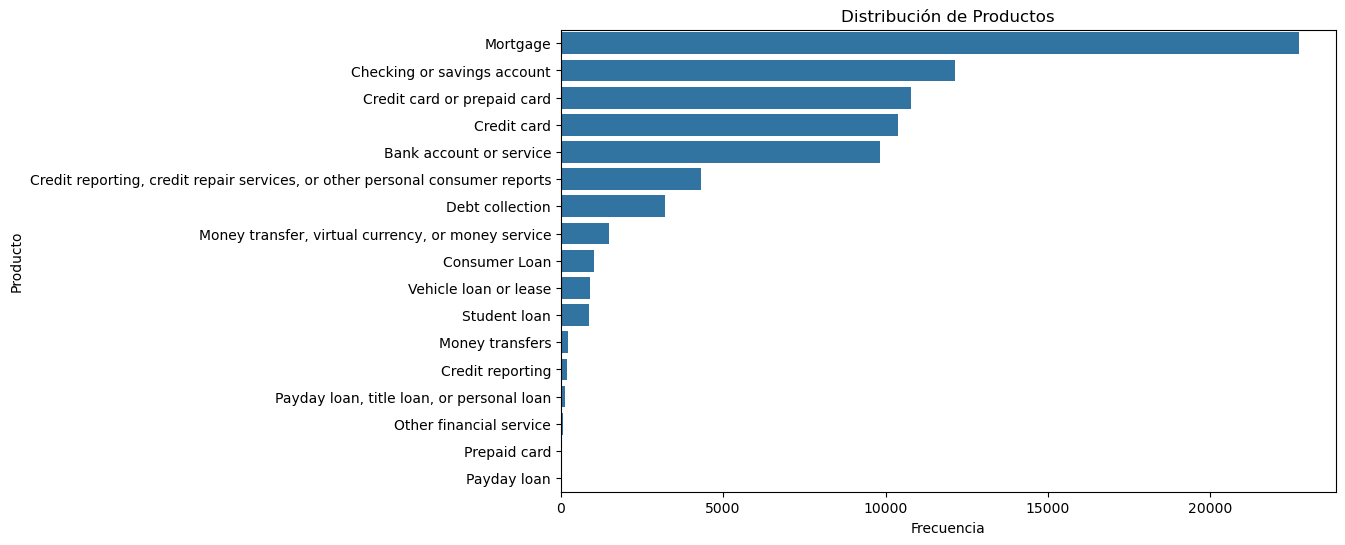

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de productos
plt.figure(figsize=(10, 6))
sns.countplot(data=df_selected, y="_source.product", order=df_selected["_source.product"].value_counts().index)
plt.title("Distribución de Productos")
plt.xlabel("Frecuencia")
plt.ylabel("Producto")
plt.show()

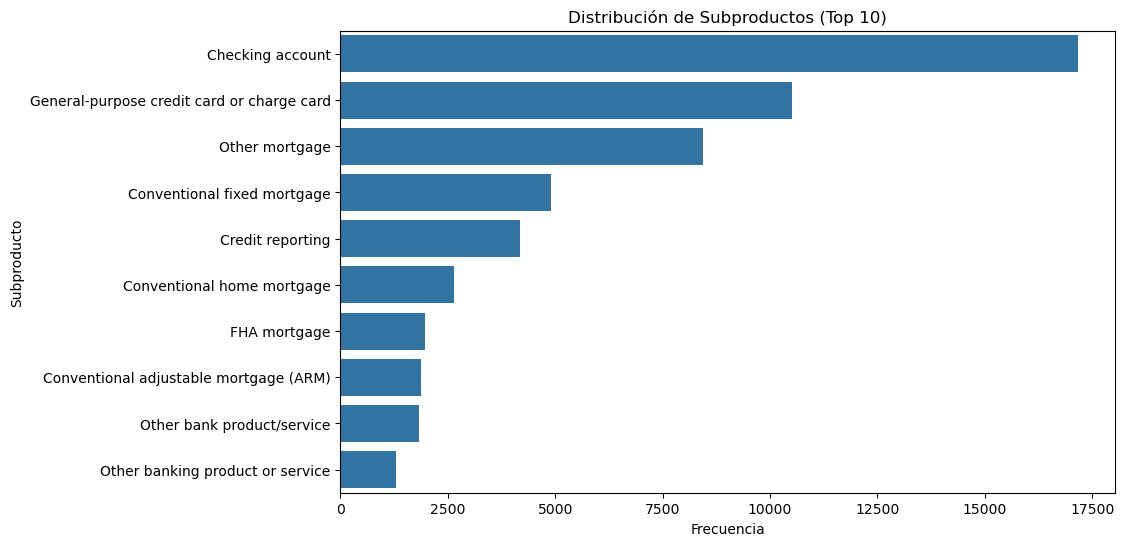

In [14]:
# Distribución de subproductos (los 10 más comunes)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_selected, y="_source.sub_product", order=df_selected["_source.sub_product"].value_counts().head(10).index)
plt.title("Distribución de Subproductos (Top 10)")
plt.xlabel("Frecuencia")
plt.ylabel("Subproducto")
plt.show()


## Análisis de texto en las quejas

In [16]:
# Juntar todos los textos
all_text = " ".join(df_selected["_source.complaint_what_happened"].dropna())

# Contar palabras
word_counts = Counter(all_text.split())

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

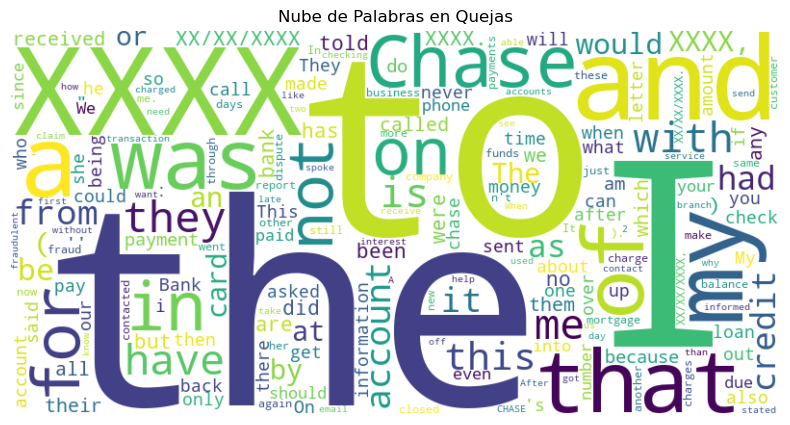

In [17]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras en Quejas")
plt.show()


En este caso las 'x' son más que nada creo cuando se refiere a algún nombre o refiriendose a algo personal supongo por eso la 'censura'

### Relación entre categorías y subcategorías:


In [18]:
# Tabulación cruzada entre productos y subproductos
product_subproduct = pd.crosstab(df_selected["_source.product"], df_selected["_source.sub_product"])

In [20]:
product_subproduct.head()

_source.sub_product,(CD) Certificate of deposit,Auto,Auto debt,CD (Certificate of Deposit),Cashing a check without an account,Check cashing,Check cashing service,Checking account,Conventional adjustable mortgage (ARM),Conventional fixed mortgage,...,Savings account,Second mortgage,Store credit card,Title loan,Traveler's check or cashier's check,Traveler’s/Cashier’s checks,VA mortgage,Vehicle lease,Vehicle loan,Virtual currency
_source.product,,,,,,,,,,,,,,,,,,,,,
Bank account or service,239,0,0,0,77,0,0,7116,0,0,...,562,0,0,0,0,0,0,0,0,0
Checking or savings account,0,0,0,121,0,0,0,10066,0,0,...,651,0,0,0,0,0,0,0,0,0
Consumer Loan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,90,750,0
Credit card or prepaid card,0,0,0,0,0,0,0,0,0,0,...,0,0,160,0,0,0,0,0,0,0
"Credit reporting, credit repair services, or other personal consumer reports",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


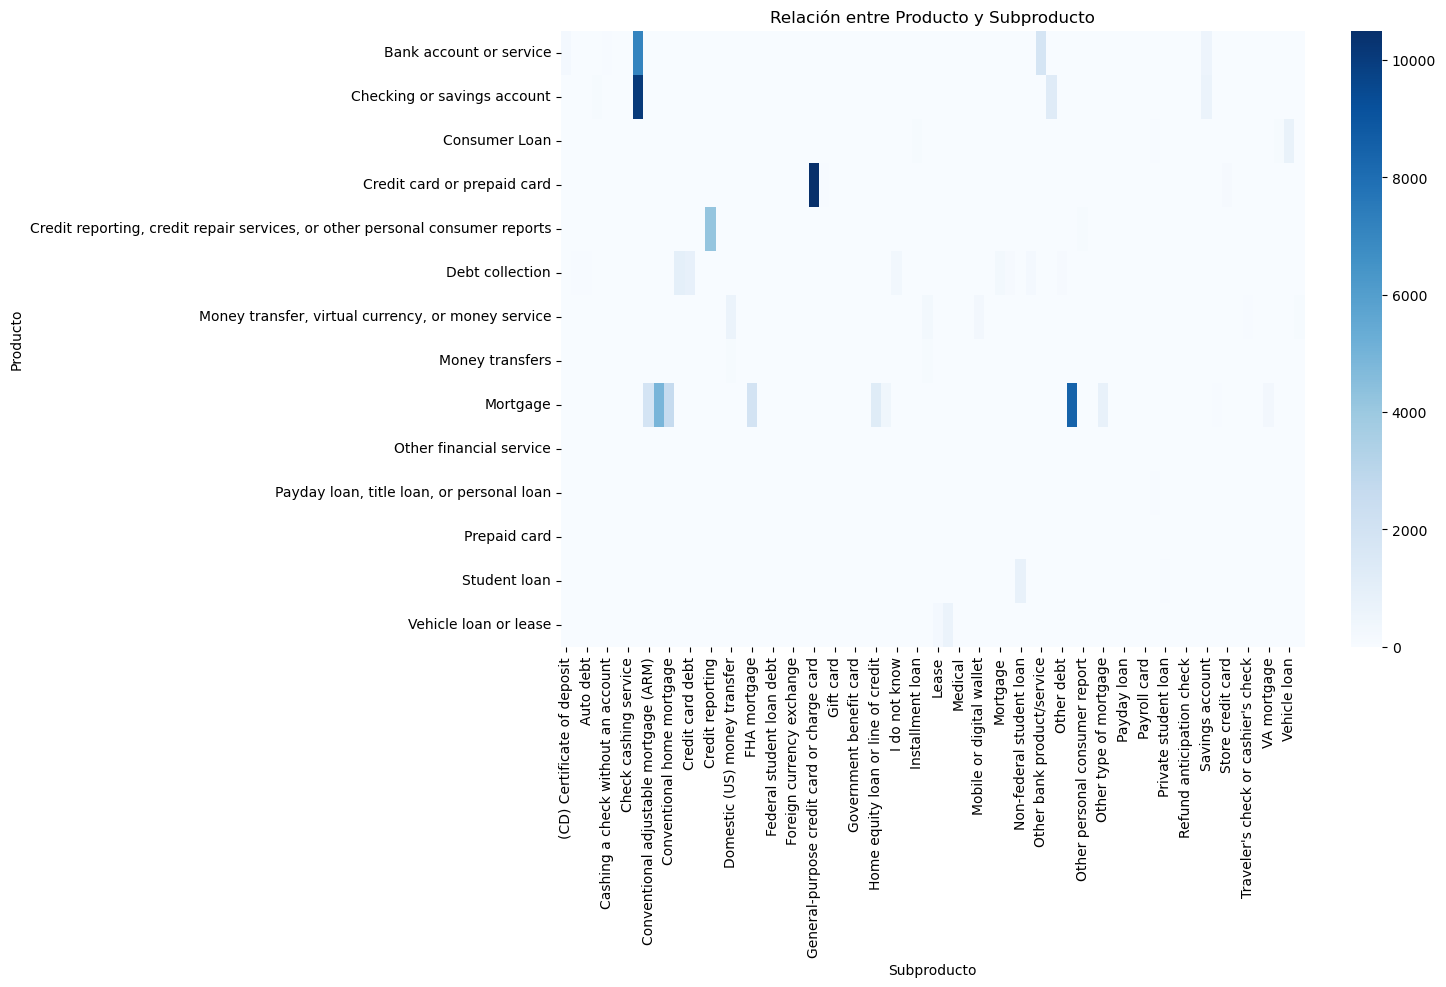

In [21]:
# Heatmap de productos y subproductos
plt.figure(figsize=(12, 8))
sns.heatmap(product_subproduct, cmap="Blues", cbar=True)
plt.title("Relación entre Producto y Subproducto")
plt.xlabel("Subproducto")
plt.ylabel("Producto")
plt.show()

In [23]:
product_subproduct.columns

Index(['(CD) Certificate of deposit', 'Auto', 'Auto debt',
       'CD (Certificate of Deposit)', 'Cashing a check without an account',
       'Check cashing', 'Check cashing service', 'Checking account',
       'Conventional adjustable mortgage (ARM)', 'Conventional fixed mortgage',
       'Conventional home mortgage', 'Credit card', 'Credit card debt',
       'Credit repair services', 'Credit reporting', 'Debt settlement',
       'Domestic (US) money transfer',
       'Electronic Benefit Transfer / EBT card', 'FHA mortgage',
       'Federal student loan', 'Federal student loan debt',
       'Federal student loan servicing', 'Foreign currency exchange',
       'General purpose card', 'General-purpose credit card or charge card',
       'General-purpose prepaid card', 'Gift card', 'Gift or merchant card',
       'Government benefit card', 'Government benefit payment card',
       'Home equity loan or line of credit',
       'Home equity loan or line of credit (HELOC)', 'I do not know',


En este caso podemos ver que hay una fuerte relación entre 'Bank account of service',  'Conventional adjustable mortgage (ARM' y 'cheking or service account'.

También con 'Other personal consumer report' y 'Mortgage'